In [ ]:
# Data Prediksi Tanam Saham di Bank Mega dengan Berpatokan pada Indeks Harga Saham Gabungan (IHSG)
# Tiap Cell berisi step by step untung menemukan insight dari data yang ada
# Data yang diambil sebagai bahan train adalah data saham Bank Mega pada tahun 2021-01-01 - 2024-01-01
# Data yang diambil sebagai bahan test apakah rumus yang dihasilkan oleh Machine adalah data saham Bank Mega-
# pada tahun 2024-01-02-2024-12-31
# Silakan liat cell by cell-nya

# by: Gerald Jepedro Sitorus

In [1]:
# Import library utama

# yfinance: Mengambil data historis pasar saham dari Yahoo Finance
import yfinance as yf

# pandas: Melakukan manipulasi dan analisis data
import pandas as pd

# matplotlib & seaborn: Membuat visualisasi grafik data
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi Tampilan Grafik
sns.set_style('whitegrid')               # Mengatur gaya latar belakang grafik
plt.rcParams['figure.figsize'] = (12, 6) # Mengatur ukuran default gambar

print("Import library berhasil.")

Import library berhasil.


In [2]:
# Perbaikan Konfigurasi dan Download Data

# MEGA.JK = Bank Mega Jakarta
# ^JKSE = Indeks IHSG
kode_saham = ['MEGA.JK', '^JKSE']

# Periode
tanggal_mulai = '2021-01-01'
tanggal_akhir = '2024-12-31'

print(f"Mengunduh data saham: {kode_saham}...")

# Simpan hanya data Adj Close. Open, High, Low, dan Volume tidak diikutkan.
# start dari tanggal_mulai dan end di tanggal_akhir
data_saham = yf.download(kode_saham, start=tanggal_mulai, end=tanggal_akhir, auto_adjust=False)['Adj Close']

# Rename kolom
data_saham = data_saham.rename(columns={
    'MEGA.JK': 'Bank Mega', 
    '^JKSE': 'IHSG'
})

# Cek apakah pengunduhan data berhasil dengan hanya print head-nya saja.
print("\nData berhasil diambil! Berikut 5 baris pertama:")
data_saham.head()

Mengunduh data saham: ['MEGA.JK', '^JKSE']...


[*********************100%***********************]  2 of 2 completed


Data berhasil diambil! Berikut 5 baris pertama:


Ticker,Bank Mega,IHSG
Date,,
2021-01-04,3280.813965,6104.897949
2021-01-05,3280.813965,6137.342773
2021-01-06,3280.813965,6065.682129
2021-01-07,3468.288818,6153.632812
2021-01-08,4159.603516,6257.834961


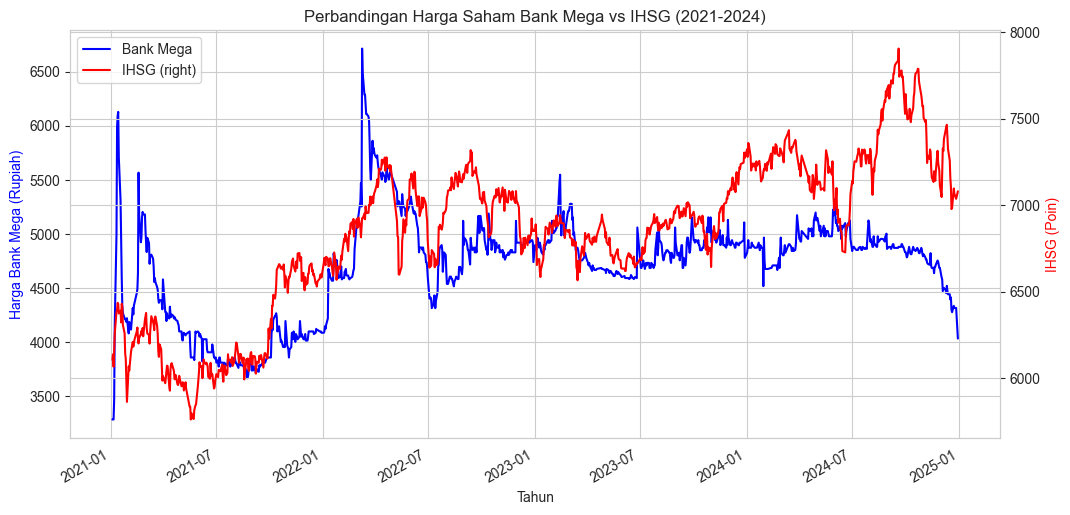

In [3]:
# Visualisasi Data dengan Grafik

import matplotlib.pyplot as plt

# 1. Bikin canvas dan plot Bank Mega (Garis Biru)
ax1 = data_saham['Bank Mega'].plot(figsize=(12, 6), color='blue', label='Bank Mega', legend=False)

# 2. Plot IHSG (Garis Merah) di sumbu kanan
ax2 = data_saham['IHSG'].plot(secondary_y=True, color='red', label='IHSG', ax=ax1, legend=False)

# 3. Set label sumbu
ax1.set_ylabel('Harga Bank Mega (Rupiah)', color='blue')
ax2.set_ylabel('IHSG (Poin)', color='red')
ax1.set_xlabel('Tahun')

# 4. Gabungkan keterangan
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc='upper left')

# Judul Grafik
plt.title('Perbandingan Harga Saham Bank Mega vs IHSG (2021-2024)')
plt.grid(True)
plt.show()

In [ ]:
# Didapat insight sementara dari grafik di atas:

# Kesenjangan yang ditunjukkan terlalu aneh dan acak oleh saham Bank Mega dibadingkan IHSG.
# Terkadang saham Bank Mega naik drastis, padahal IHSG turun, dan sebaliknya.
# Hal ini menunjukkan bahwa hubungan antara saham Bank Mega dan IHSG mungkin tidak linear.
# Oleh karena itu, perlu dilakukan analisis lebih lanjut untuk memahami hubungan ini.

In [4]:
# Menghitung Daily Return (Persentase Keuntungan Harian)

# Hitung persen perubahan dari hari sebelumnya
ret_saham = data_saham.pct_change()

# Hapus baris paling atas (Hari Pertama)
# Kenapa? Karena hari pertama tidak punya hari kemarin
ret_saham = ret_saham.dropna()

# Tampilkan 5 data pertama
print("Data dalam bentuk Persentase:")
ret_saham.head()

Data dalam bentuk Persentase:


Ticker,Bank Mega,IHSG
Date,,
2021-01-05,0.000000,0.005315
2021-01-06,0.000000,-0.011676
2021-01-07,0.057143,0.014500
2021-01-08,0.199324,0.016933
2021-01-11,0.200000,0.019991


In [5]:
# Membagi Data Training dan Data Test

# Batas
tanggal_potong = '2024-01-01'

# Data Training
train_data = ret_saham[ret_saham.index < tanggal_potong]

# Data Test
test_data = ret_saham[ret_saham.index >= tanggal_potong]

# Cek jumlah data
print(f"Total Data Belajar (2021-2023): {len(train_data)} hari")
print(f"Total Data Ujian (2024): {len(test_data)} hari")

# Cek hasil sementara dari Data Test
# Gunanya untuk mengecek apakah sudah benar Data Test dimulai dari tahun 2024-01-02
test_data.head()

Total Data Belajar (2021-2023): 731 hari
Total Data Ujian (2024): 237 hari


Ticker,Bank Mega,IHSG
Date,,
2024-01-02,0.009804,0.006984
2024-01-03,0.009709,-0.006076
2024-01-04,0.014423,0.011083
2024-01-05,-0.014218,-0.001242
2024-01-08,0.000000,-0.009121


In [6]:
# Melatih Model Linear Regression

from sklearn.linear_model import LinearRegression

# 1. Siapkan Data
# Format array 2D untuk X
X_train = train_data['IHSG'].values.reshape(-1, 1)  # IHSG
y_train = train_data['Bank Mega'].values            # Bank Mega

# 2. Panggil Algoritma
model = LinearRegression()

# 3. Learning Process (Training)
# Mesin mencari algoritma pola berdasarkan Data Training
model.fit(X_train, y_train)

# 4. Hasil
print("Hasil Persentase dalam Desimal:")
print(f"Beta (kondisi pasar bergerak): {model.coef_[0]:.5f}")
print(f"Alpha (kondisi pasar diam): {model.intercept_:.5f}")

Hasil Persentase dalam Desimal:
Beta (kondisi pasar bergerak): 0.52706
Alpha (kondisi pasar diam): 0.00070


In [ ]:
# Rumus Prediksi Saham Bank Mega:

# Prediksi Return Saham Bank Mega = (Beta * Return IHSG) + Alpha
# Dimana:
# Beta = model.coef_[0] = 0.52706
# Alpha = model.intercept_[0] = 0.00070
# Pokoknya, setiap IHSG bergerak, Bank Mega itu pasti ikut bergerak sebesar 52,7%-nya, ditambah bonus 0,07%.

In [7]:
# Melakukan Prediksi

# 1. Sisipkan Data IHSG 2024
X_test = test_data['IHSG'].values.reshape(-1, 1)

# 2. Patokan Data Bank Mega 2024
y_test_asli = test_data['Bank Mega'].values

# 3. Mesin Memprediksi
y_prediksi = model.predict(X_test)

# 4. Skor Akurasi (R-Squared)
nilai_ujian = model.score(X_test, y_test_asli)

print("Hasil Akurasi dalam Desimal:")
print(f"Skor Akurasi (R-Squared): {nilai_ujian:.5f}")

Hasil Akurasi dalam Desimal:
Skor Akurasi (R-Squared): -0.06521


In [ ]:
# Insight setelah digunakan rumus dari data training ke data test:

# Ketentuan:
# Disini gunakan skor akurasi R-Squared (R^2) untuk melihat seberapa akurat prediksi menggunakan model dari Machine Learningnya.
# 1. Nilai 1.0 (100%): Bahwa modelnya benar dan akurat.
# 2. Nilai 0.0 (0%): Modelnya mungkin akurat mungkin tidak.
# 3. Nilai Negatif (-): Modelnya melenceng dan tidak akurat.

# Hasil:
# Skor akurasi (R-Squared) menunjukkan di angka -0.06521

# Insight (Kesimpulan):
# Model yang dihasilkan oleh Machine Learning tidak akurat dalam memprediksi return saham Bank Mega berdasarkan return IHSG pada tahun 2024.
# Pada tahun 2024, Bank Mega menunjukkan perilaku yang tidak sesuai dengan pola yang dipelajari dari data sebelumnya (2021-2023).
# Hal ini mengindikasikan bahwa faktor-faktor lain mungkin memengaruhi pergerakan saham Bank Mega pada tahun 2024 yang-
# tidak tercakup dalam model sederhana ini.
# Oleh karena itu, perlu dilakukan analisis lebih lanjut dan mungkin mempertimbangkan variabel tambahan untuk-
# meningkatkan akurasi prediksi di masa depan.

# SADDDDDDNEEEEESSSSSS

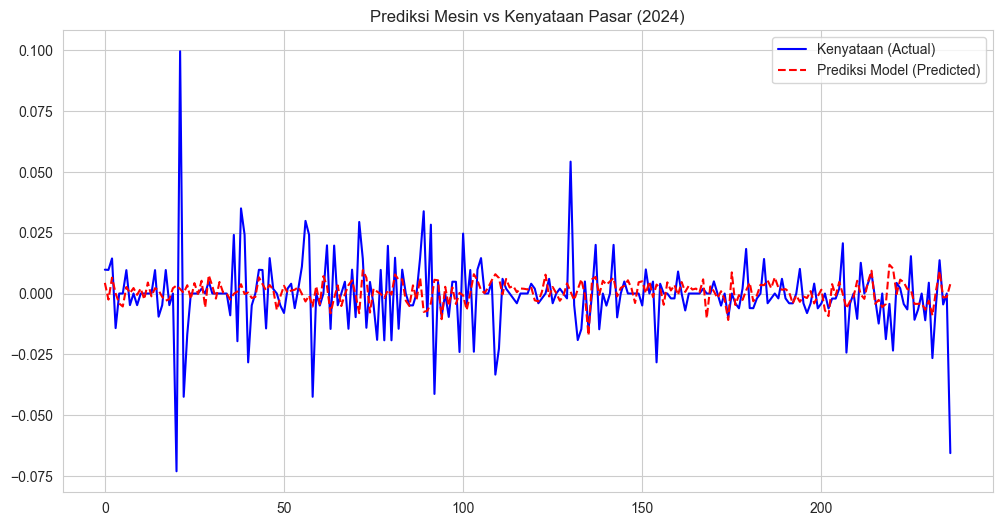

In [8]:
# Visualisasi Prediksi vs Aktual

plt.figure(figsize=(12, 6))

# Visual Garis Kenyataan Pasar
plt.plot(y_test_asli, label='Kenyataan (Actual)', color='blue')

# Visual Garis Prediksi Mesin
plt.plot(y_prediksi, label='Prediksi Model (Predicted)', color='red', linestyle='--')

plt.title('Prediksi Mesin vs Kenyataan Pasar (2024)')
plt.legend()
plt.show()

In [11]:
# Menyimpan Model ke dalam File

import joblib
import os

# 1. Letakkan di folder models
folder = 'models'

# 2. Penamaan model
nama_file = '../models/model_ihsg_mega_v1_salah.pkl'

# 3. Simpan
joblib.dump(model, nama_file)

print(f"Berhasil disimpan di: {nama_file}")

Berhasil disimpan di: ../models/model_ihsg_mega_v1_salah.pkl
